# 데이터 로딩

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Read Data
df_combined_all_new = pd.read_csv('C:\/0815/game_rhino_fn.csv', index_col='Unnamed: 0')

# Select Columns
df_combined_all_filtered = df_combined_all_new[['content', 'score']]

# Remove Unwanted Scores
df_combined_all_filtered = df_combined_all_filtered[df_combined_all_filtered['score'] != 3]
df_combined_all_filtered = df_combined_all_filtered[df_combined_all_filtered['score'] != 4]

# Change Scores to Binary
df_combined_all_filtered['score'] = df_combined_all_filtered['score'].apply(lambda x: -1 if x in [1, 2] else 1)

# Drop Missing Values
df_combined_all_filtered = df_combined_all_filtered.dropna(subset=['content', 'score'])

# TF-IDF Transformation
tfidf_vectorizer_all = TfidfVectorizer()
X_balanced_all = tfidf_vectorizer_all.fit_transform(df_combined_all_filtered['content'])
y_balanced_all = df_combined_all_filtered['score']

# Train-Test Split with Stratified Sampling
X_train_balanced_all, X_test_balanced_all, y_train_balanced_all, y_test_balanced_all = train_test_split(
    X_balanced_all, y_balanced_all, test_size=0.2, random_state=42, stratify=y_balanced_all
)

# RandomForest

In [7]:
# TF-IDF Transformation
tfidf_vectorizer_rf = TfidfVectorizer(max_features= 13000, ngram_range= (1, 2))
X_balanced_rf = tfidf_vectorizer_rf.fit_transform(df_combined_all_filtered['content'])
y_balanced_rf = df_combined_all_filtered['score']

# Train-Test Split with Stratified Sampling
X_train_balanced_rf, X_test_balanced_rf, y_train_balanced_rf, y_test_balanced_rf = train_test_split(
    X_balanced_rf, y_balanced_rf, test_size=0.2, random_state=42, stratify=y_balanced_rf
)

# TF-IDF 변환
#X_new = tfidf_vectorizer_all.transform(df_combined_all_new['content'])

# Sentiment 예측
#df_combined_all_new['Sentiment'] = logistic_regression_balanced_all.predict(X_new)

# 결과를 새로운 CSV 파일로 저장
#df_combined_all_new.to_csv('C:\/test99.csv', index=False)


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

rf.fit(X_train_balanced_rf,y_train_balanced_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#예측점수 확인
round(rf.score(X_test_balanced_rf,y_test_balanced_rf),3)

0.888

In [12]:
# K-fold 교차 검증 수행 (예: K=5)
cv_scores_rf = cross_val_score(rf, X_balanced_rf, y_balanced_rf, cv=5)

# 결과 출력
print("랜덤 포레스트 교차검증 결과")
print("K-fold Cross Validation Scores:", cv_scores_rf)
print("Mean Accuracy:", cv_scores_rf.mean())
print("Standard Deviation:", cv_scores_rf.std())

랜덤 포레스트 교차검증 결과
K-fold Cross Validation Scores: [0.87525635 0.89081395 0.86966054 0.89144272 0.87283401]
Mean Accuracy: 0.880001510094953
Standard Deviation: 0.009258891459467584


In [13]:
from sklearn.metrics import confusion_matrix

# rf_new 모델로 예측하기
y_pred_rf = rf.predict(X_test_balanced_rf)

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_test_balanced_rf, y_pred_rf)

# 혼동 행렬에서 값을 추출
TN, FP, FN, TP = conf_mat.ravel()

# 정확도와 오분류율 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy

# 결과 출력
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", round(accuracy,3))
print("오분류율:", round(misclassification_rate,3))

Confusion Matrix:
[[3735  816]
 [ 763 8827]]
Accuracy: 0.888
오분류율: 0.112


In [27]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred_rf = rf.predict(X_test_balanced_rf)

precision = precision_score(y_test_balanced_rf, y_pred_rf)
print('Precision:', round(precision,3))
recall = recall_score(y_test_balanced_rf, y_pred_rf)
print('Recall:', round(recall,3))
f1 = f1_score(y_test_balanced_rf, y_pred_rf)
print('F1 score:', round(f1,3))

Precision: 0.915
Recall: 0.92
F1 score: 0.918


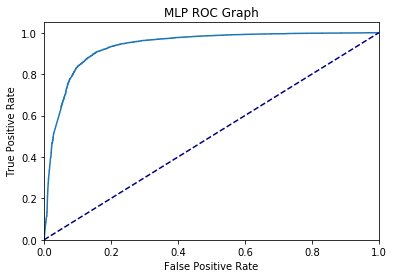

AUC Score: 0.9349703934713727


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델의 예측 확률을 계산합니다.
y_pred_proba_rf = rf.predict_proba(X_test_balanced_rf)[:,1]

# ROC 커브를 계산합니다.
fpr, tpr, _ = roc_curve(y_test_balanced_rf, y_pred_proba_rf)

# ROC 커브를 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Graph')
plt.show()

# AUC를 계산합니다.
auc_score = roc_auc_score(y_test_balanced_rf, y_pred_proba_rf)
print('AUC Score:', auc_score)


# SVC

In [17]:
from sklearn.svm import SVC
svc = SVC(C= 100, gamma= 'scale', kernel= 'rbf',probability=True)
svc.fit(X_train_balanced_all, y_train_balanced_all)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
round(svc.score(X_test_balanced_all,y_test_balanced_all),3)

0.896

In [25]:
# K-fold 교차 검증 수행 (예: K=5)
cv_scores_svc = cross_val_score(svc, X_balanced_all, y_balanced_all, cv=5)

# 결과 출력
print("랜덤 포레스트 교차검증 결과")
print("K-fold Cross Validation Scores:", cv_scores_svc)
print("Mean Accuracy:", cv_scores_logreg.mean())
print("Standard Deviation:", cv_scores_logreg.std())

랜덤 포레스트 교차검증 결과
K-fold Cross Validation Scores: [0.87596351 0.8901775  0.87765205 0.89356436 0.87997737]
Mean Accuracy: 0.8826607261823843
Standard Deviation: 0.006928832185581343


In [49]:

# 결과 출력
print("SVC 교차검증 결과")
print("K-fold Cross Validation Scores:", cv_scores_svc)
print("Mean Accuracy:", cv_scores_svc.mean())
print("Standard Deviation:", cv_scores_svc.std())

SVC 교차검증 결과
K-fold Cross Validation Scores: [0.87596351 0.8901775  0.87765205 0.89356436 0.87997737]
Mean Accuracy: 0.8834669566670318
Standard Deviation: 0.007060891094614308


In [32]:
from sklearn.metrics import confusion_matrix

# rf_new 모델로 예측하기
y_pred_svc = svc.predict(X_test_balanced_all)

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_test_balanced_all, y_pred_svc)

# 혼동 행렬에서 값을 추출
TN, FP, FN, TP = conf_mat.ravel()

# 정확도와 오분류율 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy

# 결과 출력
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", round(accuracy,3))
print("오분류율:", round(misclassification_rate,3))

Confusion Matrix:
[[3725  826]
 [ 638 8952]]
Accuracy: 0.896
오분류율: 0.104


In [33]:
# 평가지표 산출

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_svc = precision_score(y_test_balanced_all, y_pred_svc)
print('precision:', round(precision_svc,3))
recall_svc = recall_score(y_test_balanced_all, y_pred_svc)
print('recall:', round(recall_svc,3))
f1_svc = f1_score(y_test_balanced_all, y_pred_svc)
print('f1 score:', round(f1_svc,3))

precision: 0.916
recall: 0.933
f1 score: 0.924


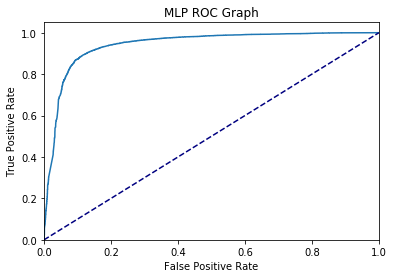

AUC Score: 0.9409907045833696


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델의 예측 확률을 계산합니다.
y_pred_proba_svc = svc.predict_proba(X_test_balanced_all)[:,1]

# ROC 커브를 계산합니다.
fpr, tpr, _ = roc_curve(y_test_balanced_all, y_pred_proba_svc)

# ROC 커브를 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Graph')
plt.show()

# AUC를 계산합니다.
auc_score = roc_auc_score(y_test_balanced_all, y_pred_proba_svc)
print('AUC Score:', auc_score)


# MLP

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes=(100,), learning_rate= 'adaptive', solver= 'adam')
mlp.fit(X_train_balanced_all, y_train_balanced_all)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
mlp.score(X_train_balanced_all, y_train_balanced_all)

0.964515558698727

In [26]:
# K-fold 교차 검증 수행 (예: K=5)
cv_scores_mlp = cross_val_score(mlp, X_balanced_all, y_balanced_all, cv=5)

# 결과 출력
print("랜덤 포레스트 교차검증 결과")
print("K-fold Cross Validation Scores:", cv_scores_mlp)
print("Mean Accuracy:", cv_scores_mlp.mean())
print("Standard Deviation:", cv_scores_mlp.std())

랜덤 포레스트 교차검증 결과
K-fold Cross Validation Scores: [0.87384202 0.88642953 0.8791372  0.89335219 0.87431926]
Mean Accuracy: 0.8826607261823843
Standard Deviation: 0.006928832185581343


In [51]:
print("K-fold Cross Validation Scores:", cv_scores_mlp)
print("Mean Accuracy:", cv_scores_mlp.mean())
print("Standard Deviation:", cv_scores_mlp.std())

K-fold Cross Validation Scores: [0.87384202 0.88642953 0.8791372  0.89335219 0.87431926]
Mean Accuracy: 0.881416040278755
Standard Deviation: 0.007490394231950657


In [50]:
from sklearn.metrics import confusion_matrix

# rf_new 모델로 예측하기
y_pred_mlp = mlp.predict(X_test_balanced_all)

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_test_balanced_all, y_pred_mlp)

# 혼동 행렬에서 값을 추출
TN, FP, FN, TP = conf_mat.ravel()

# 정확도와 오분류율 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy

# 결과 출력
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", round(accuracy,3))
print("오분류율:", round(misclassification_rate,3))

Confusion Matrix:
[[3640  911]
 [ 572 9018]]
Accuracy: 0.895
오분류율: 0.105


In [39]:
# 평가지표 산출 

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_mlp = precision_score(y_test_balanced_all, y_pred_mlp)
print('precision:', round(precision_mlp,3))
recall_mlp = recall_score(y_test_balanced_all, y_pred_mlp)
print('recall:', round(recall_mlp,3))
f1_mlp = f1_score(y_test_balanced_all, y_pred_mlp)
print('f1 score:', round(f1_mlp,3))

precision: 0.908
recall: 0.94
f1 score: 0.924


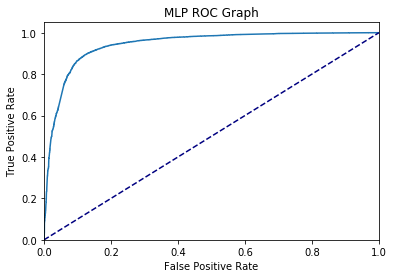

AUC Score: 0.9427169864235914


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델의 예측 확률을 계산합니다.
y_pred_proba_mlp = mlp.predict_proba(X_test_balanced_all)[:,1]

# ROC 커브를 계산합니다.
fpr, tpr, _ = roc_curve(y_test_balanced_all, y_pred_proba_mlp)

# ROC 커브를 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Graph')
plt.show()

# AUC를 계산합니다.
auc_score = roc_auc_score(y_test_balanced_all, y_pred_proba_mlp)
print('AUC Score:', auc_score)


# LogisticRegression

In [21]:
# TF-IDF Transformation
tfidf_vectorizer_logreg = TfidfVectorizer(max_features= 15000, ngram_range= (1, 2))
X_balanced_logreg = tfidf_vectorizer_logreg.fit_transform(df_combined_all_filtered['content'])
y_balanced_logreg = df_combined_all_filtered['score']

# Train-Test Split with Stratified Sampling
X_train_balanced_logreg, X_test_balanced_logreg, y_train_balanced_logreg, y_test_balanced_logreg = train_test_split(
    X_balanced_logreg, y_balanced_logreg, test_size=0.2, random_state=42, stratify=y_balanced_logreg
)


In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 4.281332398719396, penalty = 'l2', solver = 'newton-cg')

logreg.fit(X_train_balanced_logreg, y_train_balanced_logreg)

LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
round(logreg.score(X_test_balanced_logreg,y_test_balanced_logreg),3)

0.891

In [24]:
# K-fold 교차 검증 수행 (예: K=5)
cv_scores_logreg = cross_val_score(logreg, X_balanced_logreg, y_balanced_logreg, cv=5)

# 결과 출력
print("랜덤 포레스트 교차검증 결과")
print("K-fold Cross Validation Scores:", cv_scores_logreg)
print("Mean Accuracy:", cv_scores_logreg.mean())
print("Standard Deviation:", cv_scores_logreg.std())

랜덤 포레스트 교차검증 결과
K-fold Cross Validation Scores: [0.87596351 0.8889046  0.87722772 0.89299859 0.87820921]
Mean Accuracy: 0.8826607261823843
Standard Deviation: 0.006928832185581343


In [41]:
from sklearn.metrics import confusion_matrix

# rf_new 모델로 예측하기
y_pred_logreg = logreg.predict(X_test_balanced_logreg)

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_test_balanced_logreg, y_pred_logreg)

# 혼동 행렬에서 값을 추출
TN, FP, FN, TP = conf_mat.ravel()

# 정확도와 오분류율 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy

# 결과 출력
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", round(accuracy,3))
print("오분류율:", round(misclassification_rate,3))

Confusion Matrix:
[[3598  953]
 [ 590 9000]]
Accuracy: 0.891
오분류율: 0.109


In [42]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test_balanced_logreg, y_pred_logreg)
print('Precision:', round(precision,3))
recall = recall_score(y_test_balanced_logreg, y_pred_logreg)
print('Recall:', round(recall,3))
f1 = f1_score(y_test_balanced_logreg, y_pred_logreg)
print('F1 score:', round(f1,3))

Precision: 0.904
Recall: 0.938
F1 score: 0.921


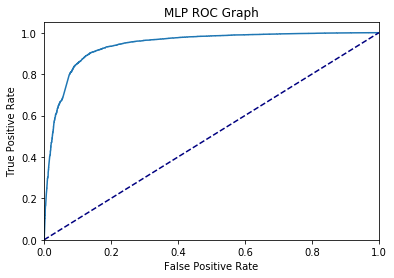

AUC Score: 0.939640223911187


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델의 예측 확률을 계산합니다.
y_pred_proba_logreg = logreg.predict_proba(X_test_balanced_logreg)[:,1]

# ROC 커브를 계산합니다.
fpr, tpr, _ = roc_curve(y_test_balanced_logreg, y_pred_proba_logreg)

# ROC 커브를 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Graph')
plt.show()

# AUC를 계산합니다.
auc_score = roc_auc_score(y_test_balanced_logreg, y_pred_proba_logreg)
print('AUC Score:', auc_score)


In [55]:
from joblib import dump
dump(svc, "C:\/final/svc.joblib")
dump(rf, "C:\/final/rf.joblib")
dump(mlp, 'C:\/final/mlp.joblib')
dump(logreg, 'C:\/final/logreg.joblib')
dump(tfidf_vectorizer_logreg, 'C:\/final/tfidf_logreg')
dump(tfidf_vectorizer_all,'C:\/final/tfidf_all')
dump(tfidf_vectorizer_rf, 'C:\/final/tfidf_rf')

['C:\\/final/tfidf_rf']